# K Means Clustering with Customer Data
Using the data from the Berkley UCI Machine learning repository, we will try to perform k means clustering around multiple dimensions and then plotting the results.

First, let's begin with importing the data and getting a summary of the entire data.

In [3]:
data <-read.csv("data/Wholesale customers data.csv",header=T)
summary(data)

    Channel          Region          Fresh             Milk      
 Min.   :1.000   Min.   :1.000   Min.   :     3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128   1st Qu.: 1533  
 Median :1.000   Median :3.000   Median :  8504   Median : 3627  
 Mean   :1.323   Mean   :2.543   Mean   : 12000   Mean   : 5796  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934   3rd Qu.: 7190  
 Max.   :2.000   Max.   :3.000   Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper    Delicassen     
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

## Removing Top 5 customers
Since the data that we are dealing with has a very wide range, and K means clustering works best when we try to do it on the middle portion of our data, it is safe to assume that removing the top 5 customers from every column in the data will give us better results for K Means Clustering.

In [4]:
top.n.custs <- function (data,cols,n=5) { 
    idx.to.remove <-integer(0)
    for (c in cols){ 
        col.order <-order(data[,c],decreasing=T) 
        idx <-head(col.order, n)
        idx.to.remove <-union(idx.to.remove,idx)
    }
    return(idx.to.remove) #Return the indexes of customers to be removed
}

In [7]:
top.custs <-top.n.custs(data,cols=3:8,n=5)
length(top.custs)
data[top.custs,]
data.rm.top<-data[-c(top.custs),]

[1] 19

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
182,1,3,112151,29627,18148,16745,4948,8550
126,1,3,76237,3473,7102,16538,778,918
285,1,3,68951,4411,12609,8692,751,2406
40,1,3,56159,555,902,10002,212,2916
259,1,1,56083,4563,2124,6422,730,3321
87,2,3,22925,73498,32114,987,20070,903
48,2,3,44466,54259,55571,7782,24171,6465
86,2,3,16117,46197,92780,1026,40827,2944
184,1,3,36847,43950,20170,36534,239,47943
62,2,3,35942,38369,59598,3254,26701,2017


## K Means Clustering with Multiple Variables
Here, we will cluster the data on multiple variables in the data.rm.top data frame. We will however, remove the Channel and Region columns from our data since these two are just IDs and will not be useful when clustering the data. The rest of the columns contain the actual values.

In [9]:
set.seed(76964057)

In [11]:
k <-kmeans(data.rm.top[,-c(1,2)], centers=5)

In [12]:
k$centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,5845.392,2337.319,2878.205,2766.596,660.2952,858.994
2,4238.892,7725.289,11011.747,1336.566,4733.3614,1400.530
3,5830.214,15295.048,23449.167,1936.452,10361.6429,1912.738
4,35922.387,4851.806,5862.581,3730.677,1004.6129,1552.161
5,18649.606,3335.586,4497.848,3301.747,1046.5859,1450.566


In [13]:
table(k$cluster)


  1   2   3   4   5 
166  83  42  31  99 

## Trying out with Multiple K values
In order to get the best fit, we will try to fit the same model for various values of K, and then pick the one that is the best one according to the obtained results. We will also plot the results to find the optimal value.

Also, instead of just running the algorithm with every k value once, we will run it 100 times to get a good idea. We will take the mean of all the observed values to get the best idea.

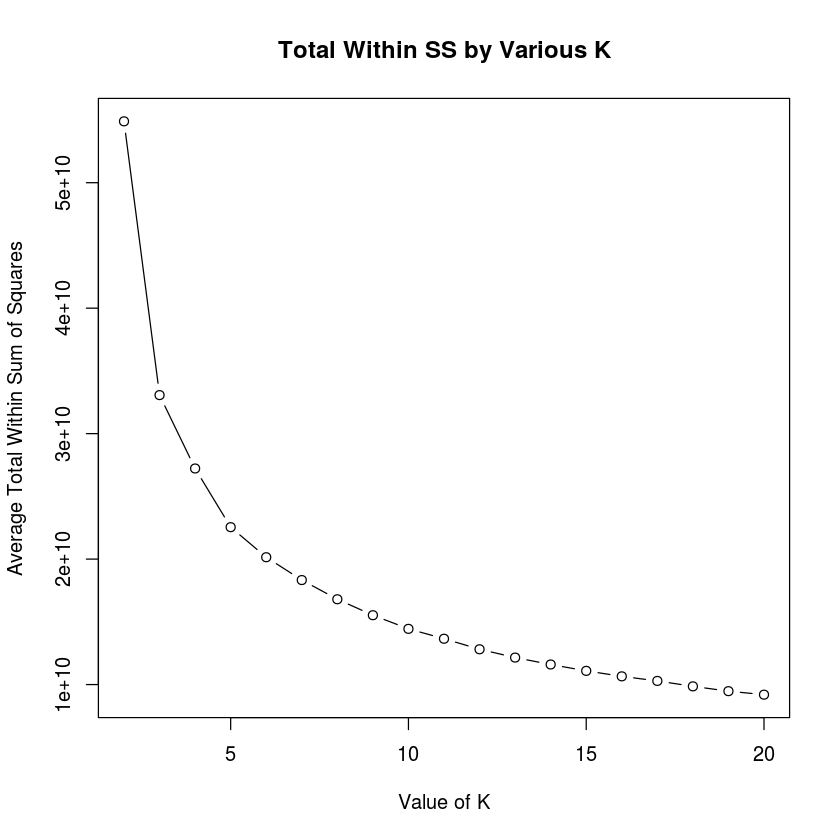

In [14]:
rng<-2:20 
tries <-100 
avg.totw.ss <-integer(length(rng))
for(v in rng){ 
    v.totw.ss <-integer(tries)
    for(i in 1:tries){
        k.temp <-kmeans(data.rm.top,centers=v)
        v.totw.ss[i] <-k.temp$tot.withinss
     }
     avg.totw.ss[v-1] <-mean(v.totw.ss)
    }
plot(rng,avg.totw.ss,type="b", main="Total Within SS by Various K", ylab="Average Total Within Sum of Squares", 
     xlab="Value of K")